In [2]:
import os
import sys
sys.path.append("/Users/01017387/LassoVariants/")
sys.path.append("/Users/01017387/bandits")
import EnumLasso
import bandits as bd


In [ ]:
# bandit問題には確率的bandit(stochastic), 敵対的bandit(adversarial)が存在する
# stochasticの場合、報酬の確率的構造が未知であるケースは対応できない？
# →報酬をうまく表現できる確率モデルが既知の場合、大きな累積報酬を見込める
# adversarialの場合、報酬の最悪ケースを考える
# ＋より広い報酬モデルを考慮する必要があるため、保証可能な性能は確率的banditよりも悪くなる

# 最大化を目指すのは以下２パターンのうちのいずれか
# 有限時間区間における累積報酬
# or
# 無限時間区間における割引された累積報酬

# どちらの場合においても、終了時刻を知らずに停止できるアルゴリズムがより実用的

In [ ]:
# 得られたサンプルから期待報酬を出すが、その確率(cvr等)がかなり低いと、中心極限定理による近似の精度担保がやや難しい
# →低い確率で起こる事象を指数関数の形で評価する方法を、大偏差原理(large deviation principle)と呼ぶ。
# 　→bandit問題における主要な評価のための道具として機能する
# 解説はないが、厳密漸近論が非常にいい近似値を与える模様(exact asymptotics)

In [ ]:
# 確率的banditにおいては
# リグレット
# Σ(Δi*Ni*(T+1))
# の最小化を目指す
# Δ = max(mu(it)) - mu(it)・・・時刻t時点での最適解と実際の差分
# Ni(T+1) = 時刻Tまでにアームiを引いた回数

# ＝最大期待値でないアームをなるべく引かない問題（Niの最小化問題）と同等

# 方策評価に使われるmetrics = 一貫性(consistency)
# ＝ある方策を取った場合、 E[regret(t)] = o(T**a)が成り立つもの
# 上記のケースにおけるリグレット下界 = 


In [ ]:
#不明点 o(T**a)が出てきたけど、一般的にoはなに？Ωは？
# o(x)=xを極限まで飛ばした時のxの近似的な挙動



In [3]:
n_arms = 10
bandit = bd.GaussianBandit(n_arms)
n_trials = 1000
n_experiments = 500

/Users/01017387/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


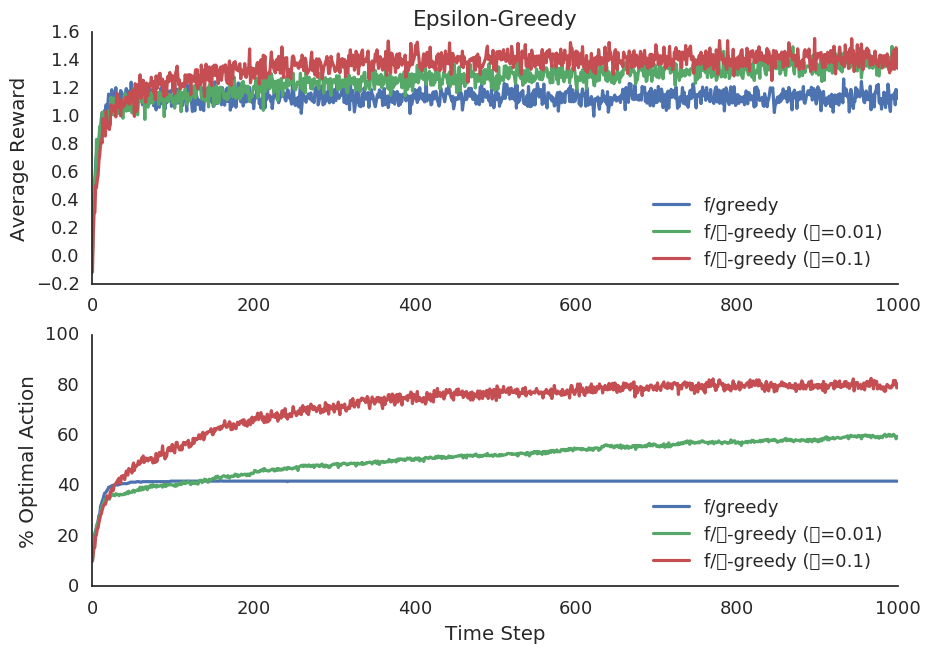

In [ ]:


agents = [
    bd.Agent(bandit, bd.GreedyPolicy()),
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.01)),
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
]
env = bd.Environment(bandit, agents, 'Epsilon-Greedy')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)



In [ ]:


agents = [
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
    bd.Agent(bandit, bd.GreedyPolicy(), prior=5)
]
env = bd.Environment(bandit, agents, 'Optimistic Initial Values')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)



In [ ]:


agents = [
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
    bd.Agent(bandit, bd.UCBPolicy(2))
]
env = bd.Environment(bandit, agents, 'Upper Confidence Bound (UCB1)')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)



In [1]:
#テキスト内容をなぞる
#epsilon-greedy - 
# 1- epsilonの確率で活用
# epsilon/2の確率で最適だと思われる選択を探求
# epsilon/2の確率で最悪だと思われる選択を探求

# 報酬定義
# -測定できるものであり、数学的に追跡できる
# -少ないより多い方がいい

#問題の性質
# １：N組のスロットが存在
# ２：どれも報酬を出すが、報酬は常に得られるものではない
# ３：選択にリスクがあるだけでなく、最初は報酬が得られる確率が全くわからない
# ４：引いた腕に関してのみ情報が得られる
# ５：最適解でない場合、最適解と比較して報酬の損失が発生

In [23]:
# epsilon = 探索の確率
# counts = それぞれの腕を何回ずつ引いたかを示す
# values = それぞれの腕を引いた時の報酬の平均

class EpsilonGreedy():
    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
        return
    
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return
    def ind_max(x):
        m = max(x)
        return x.index(m)

    def select_arm(self):
        if random.random() > self.epsilon:
            return ind_max(self.values)
        else:
            return random.randrange(len(self.values))

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]

        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [9]:
#epsilonを固定で与え続けると、学習が進むにつて、損失が大きくなってくる
# →最適な答えが出せる状態なのに、探索を同じ確率で続けるのは非効率

#モンテカルロsimが必要
#→2%と5%でクリックする腕を考えて、それをシミュレーションで動かす

In [10]:
class BernoulliArm():
    def __init__(self, p):
        self.p = p

    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

# 確率pで腕から報酬を受け取る

In [28]:
#活用
algo = EpsilonGreedy(0.2, [], [])
algo.initialize(2)

lis = []
for i in range(19):
    #探索か活用か
    no = algo.select_arm()
#     lis.append(ind_max())
    #結果を更新
    algo.update(no,arms[no].draw())


In [31]:
algo.counts
algo.values


[0.11111111111111112, 0.0]

In [15]:
import random
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = [BernoulliArm(mu) for mu in means]

In [18]:
for i in range(10):
    print(arms[0].draw() )

0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
algo = EpsilonGreedy(1.0, [], [])
initialize(algo, 2)


In [20]:
#アルゴリズム、腕の配列、シミュレーション回数、最大腕を引く回数
def test_algorithm(algo, arms, num_sims, horizon):
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0.0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims * horizon)]
    times = [0.0 for i in range(num_sims * horizon)]

    for sim in range(num_sims):
        sim = sim + 1
        algo.initialize(len(arms))

        for t in range(horizon):
            t = t + 1
            index = (sim - 1) * horizon + t - 1

    sim_nums[index] = sim
    times[index] = t

    chosen_arm = algo.select_arm()
    chosen_arms[index] = chosen_arm

    reward = arms[chosen_arms[index]].draw()
    rewards[index] = reward

    if t == 1:
        cumulative_rewards[index] = reward
    else:
        cumulative_rewards[index] = cumulative_rewards[index -1] + reward
        algo.update(chosen_arm, reward)

    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]



In [ ]:
import random
random.seed=(1)
import random
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = [BernoulliArm(mu) for mu in means]


In [32]:
#練習：
# 腕の本数を変えたケース
# 腕の確率を変えたケース
#アニーリングの追加（サチってきたら探索確率を動的に減らし、活用重視に移っていく）
# →事後的に学ぶでもOK


In [33]:
# softmax
# 既知の違いを考慮し、合理的な探求を行う
# →探索時の腕の決定に、腕の報酬レートを組み入れて探索を実施する
# →報酬比で按分した探索確率
# →確実性を増すためのアルゴリズムもいいかも（信頼度を上げる必要がある）
# →信頼区間も考慮し、片方の報酬が高い可能性を出し、その最大値が開くように探索を実施する
# 　→手間がかかるので、当初の学習は遅くなりそうな感じがする
# 　→一旦そこそこの開きが見えるようになったら、確率計算をやめて、完全オンラインに移行するとか

In [34]:
import math
import random

def categorical_draw(probs):
    z = random.random()
    cum_prob = 0.0
    for i in range(len(probs)):
        prob = probs[i]
        cum_prob += prob
        if cum_prob > z:
            return i
    return len(probs) - 1

class Softmax:
    def __init__(self, temperature, counts, values):
        self.temperature = temperature
        self.counts = counts
        self.values = values
        return

    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return

    def select_arm(self):
        z = sum([math.exp(v / self.temperature) for v in self.values])
        probs = [math.exp(v / self.temperature) / z for v in self.values]
        return categorical_draw(probs)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return


In [35]:
# tau=0で完全に最高の腕を選ぶ
# tau =Infでランダム探索

#softmaxだと発見、活用がかなりうまくできる
#アニーリングを入れればさらにうまくいくようになる


In [36]:
#アニーリングsoftmax
import math
import random

def categorical_draw(probs):
    z = random.random()
    cum_prob = 0.0
    for i in range(len(probs)):
        prob = probs[i]
        cum_prob += prob
        if cum_prob > z:
            return i

    return len(probs) -1

class AnnealingSoftmax:
    def __init__(self, counts, values):
        self.counts = counts
        self.values = values
        return

    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return

    def select_arm(self):
        t = sum(self.counts) + 1
        temperature = 1 / math.log(t + 0.0000001)
        z = sum([math.exp(v / temperature) for v in self.values])
        probs = [math.exp(v / temperature) / z for v in self.values]
        return categorical_draw(probs)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n -1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [37]:
#アニーリングの効果：
# 最良の腕を突き止めるにはやや時間がかかる
# が、ベストケースよりもそんなに悪い結果は出ない
# 一番悪いケースよりもずっと早くピークに達し、そのピークも高い
# 実際の場合には実験の手間を大幅に減らせるという観点から、かなり現実的な選択肢

In [38]:
#練習問題
# よく似た感じの報酬を与えるグループを探索する場合どうsoftmaxはどうなるか
# E-greedyとどの程度の違いが出るか

# 温度設定を変えることでE-greedyとsoftmaxにどのような違いが出るか
# そっくりな挙動をしないのならそれはなぜか

#softmaxの際、特殊なアニール設定を使ったが、temprature=1.0/t等の異なるルールを使った場合はどうなるか
# パラメータを施行グループごとに変化させた場合はどうなるか
# 例：最初１００回ではtemprature＝0.5,次の１００回で0.1等
# →うまく動作するための一般的な戦略はあるか



In [39]:
#e-greedy, softmax
# ある地点で推定値が最高の腕をデフォルトで選択
# 時に探求をするが、その地点で最良の選択肢を選ばないケースもある
# E-greedyは探求の際、確率epsilonですべての腕からランダムで探索対象を決定する
# softmaxは探索の際、腕の推定値に合わせた重み付けをしてランダムに選択する
# →アニーリングによって効率化できる

# UCB:Upper Confidence Bound
#確信の上限値に達することができればOK
# ある腕についてどれだけ知っているかも腕選択に生かす
# 選択された腕の推定値に対する確信に基づき、探求するかどうかを決定する
#→ノイズに対する頑健性が手に入ると思われる

#UCBにはいろいろ種類があるが、UCB1のみを対象とする
#UCB1における報酬の最大値は1
# →入っていないなら標準化が必要(ロジット等)
#稼動前に設定が必要なパラメータが存在しない。完全に報酬の内容と学習内容によって選択を決める


In [40]:
#劣った腕のうち、情報が少ないものを確信度を高めるために探索しに行く挙動を見せるケースがある
class UCB1():
    def __init__(self, counts, values):
        self.counts = counts
        self.values = values
        return

    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return
    def select_arm(self):
        n_arms = len(self.counts)
        for arm in range(n_arms):
            #少なくとも１度は腕を引くことで、データが存在しない状況を回避
            if self.counts[arm] == 0:
                return arm
        ucb_values = [0.0 for arm in range(n_arms)]
        total_counts = sum(self.counts)
        for arm in range(n_arms):
            bonus = math.sqrt((2 * math.log(total_counts)) / float(self.counts[arm]))
            ucb_values[arm] = self.values[arm] + bonus
        return ind_max(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n -1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [41]:
# #練習問題
# 腕の類似性が高い場合、UCB1ではどのような影響が見られるか

# ２５０回でなく、５００回の施行だとsoftmaxよりもUCB1の方が報酬が高くなりそう

# 腕の本数が多かった場合、UCB1の性能は向上するか
# ２５０回、２０本の場合、１００本、５００本の場合


In [42]:
# アルゴリズムよりも実際に探索する必要のある世界の方が複雑だった場合、アルゴリズムの方が簡単に崩壊する

#実務上の注意
#他にテストが走っていない？
#テスト期間は？
#どのくらいの人に、使うつもりのないverを見せてもいいと思っている？
#KPIは？基準は？
#使用する腕のそれぞれの関連性
#デモグラ等を追加考慮できるか
# アルゴリズムが処理速度を下げない程度に扱えるトラフィックはどの程度か
# 複数の人は同時にサイトを訪れている場合、どのような出し方にするか

#実務上の縛り条件を確認しておくことは非常に大事
